## EVANS WAHOME GICHUKI
### COMM061 - Natural Language Processing
#### 6677196

# Question: Given a plot of a story find out which genre it belongs (IMDB)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import string
import texthero as hero
from wordcloud.wordcloud import WordCloud

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
modelarr = [] # this will be used to score the best experiment and model

# Experiment 1

In [4]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


the plot_synopsis column was dropped because it was too large

In [5]:
movieDetails = movieDetails.drop(['movie_id', 'duration',"release_date","plot_synopsis"], axis=1)

In [6]:
print("Movie shape: ",movieDetails.shape)
print("Any null values?: ",movieDetails.isnull().values.any())

Movie shape:  (1572, 3)
Any null values?:  False


## Exploratory Data analysis

## Movie data quality

From the data we can see none of the movies used in the dataset had a rating lower than 1, making the distribution right skewed.

Text(0.5, 1.0, 'Counts per rating')

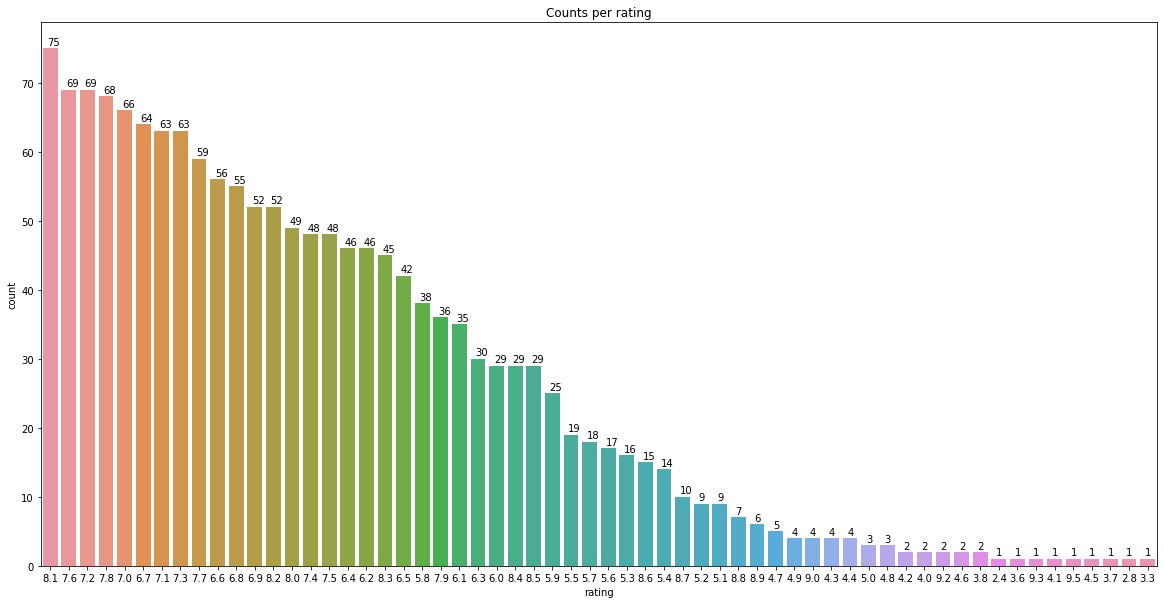

In [7]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

we will also drop rating as we do not use it for training the model

In [8]:
movieDetails = movieDetails.drop(['rating'], axis=1)

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Drama, Romance]               50
[Comedy]                       49
[Drama]                        49
                               ..
[Comedy, Drama, Sport]          1
[Adventure, Sci-Fi]             1
[Drama, Fantasy, Mystery]       1
[Biography, Drama, Family]      1
[Action, Comedy, Thriller]      1
Name: genre, Length: 237, dtype: int64


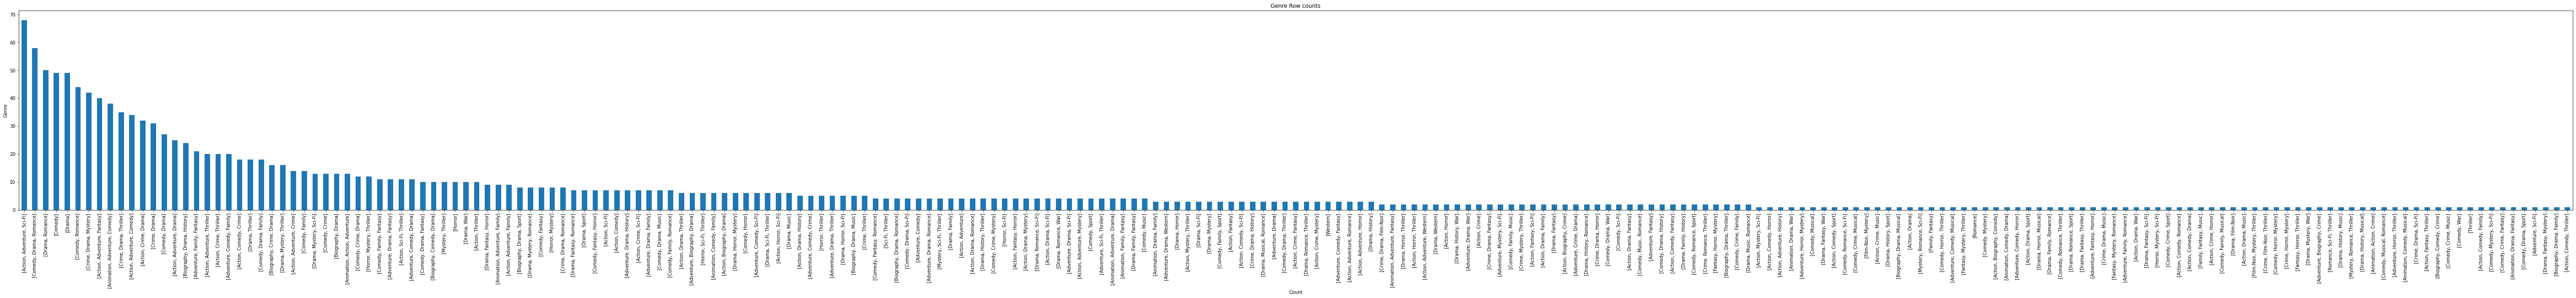

In [9]:
print(movieDetails["genre"].value_counts())
movieDetails["genre"].value_counts().plot(kind="bar",figsize=(100,8))
plt.title("Genre Row counts")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [10]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## Preprocessing function declarations

In [11]:
#for removing punctuations
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    return text2.lower()

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

def stem_text(text): 
    wordlist=[]
    ps = PorterStemmer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(ps.stem(word))
    return ' '.join(wordlist)
    
    
#lemmatization and tokenization
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Lemmatizing

cleaning, removing stopwords and lemmatization

In [13]:
movieDetails["lemmatized"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["lemmatized"] = movieDetails["lemmatized"].apply(remove_Stopwords)
movieDetails["lemmatized"] = movieDetails["lemmatized"].apply(lemmatize_text)
# movieDetails["lemmatized"]

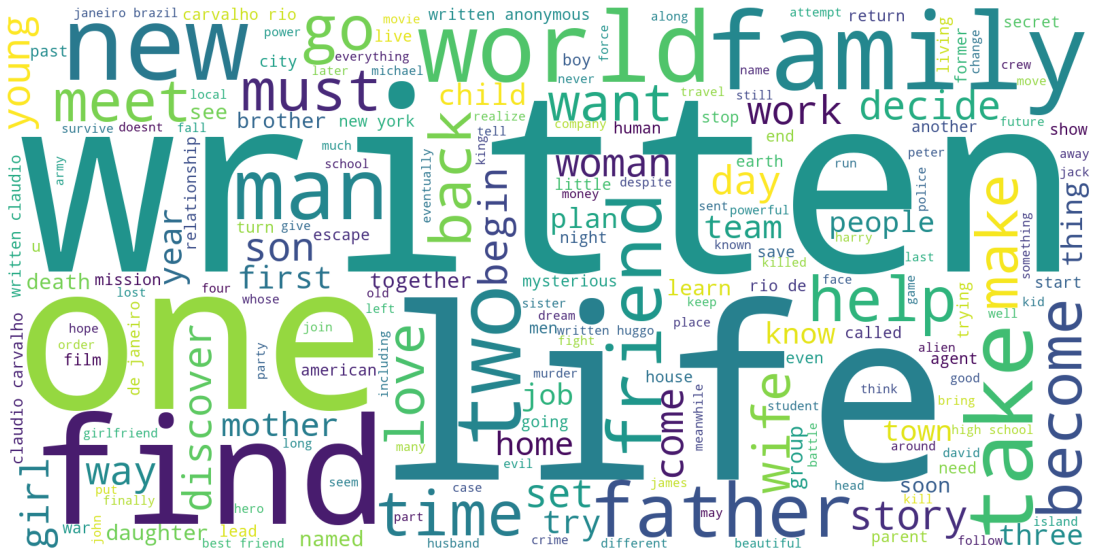

In [14]:
wordcloud = WordCloud(background_color="white",width=1600, height=800, mode="RGBA").generate(' '.join(movieDetails['lemmatized'].tolist()))
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Stemming

cleaning, removing stopwords and Stemming

In [15]:
movieDetails["stemmed"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["stemmed"] = movieDetails["stemmed"].apply(remove_Stopwords)
movieDetails["stemmed"] = movieDetails["stemmed"].apply(stem_text)
# movieDetails["stemmed"]

In [16]:
# ' '.join(movieDetails['stemmed'].tolist()) #column converted to one paragraph

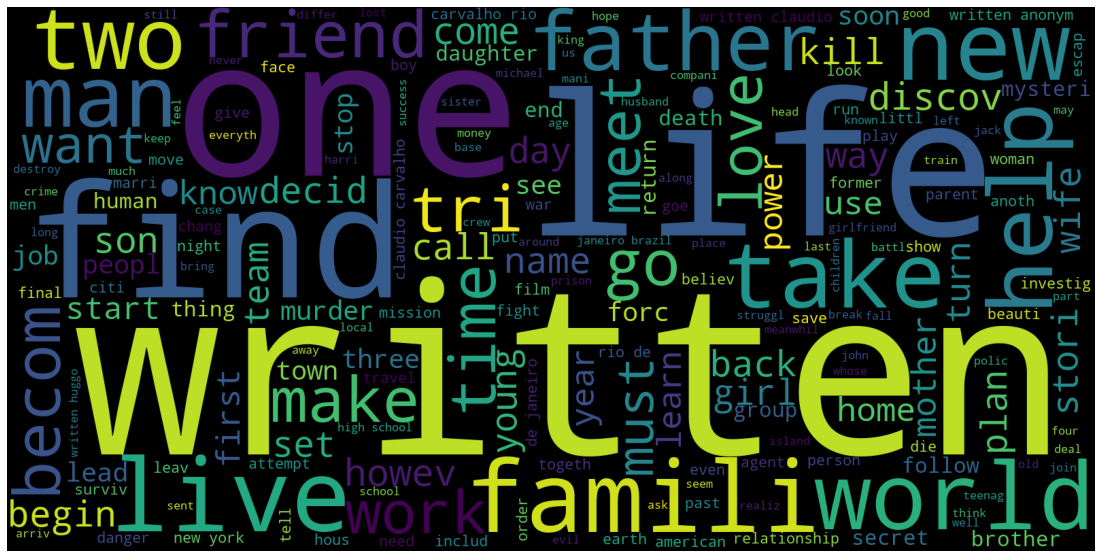

In [17]:
wordcloud2 = WordCloud(background_color="black",width=1600, height=800, mode="RGBA").generate(' '.join(movieDetails['stemmed'].tolist()))
plt.figure( figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud2)
plt.show()

In [18]:
movieDetails['num_words'] = movieDetails['plot_summary'].apply(lambda x:len(str(x).split())) 
movieDetails['num_words'].describe()

count    1572.000000
mean      102.780534
std        41.872524
min        15.000000
25%        69.000000
50%        96.000000
75%       131.000000
max       198.000000
Name: num_words, dtype: float64

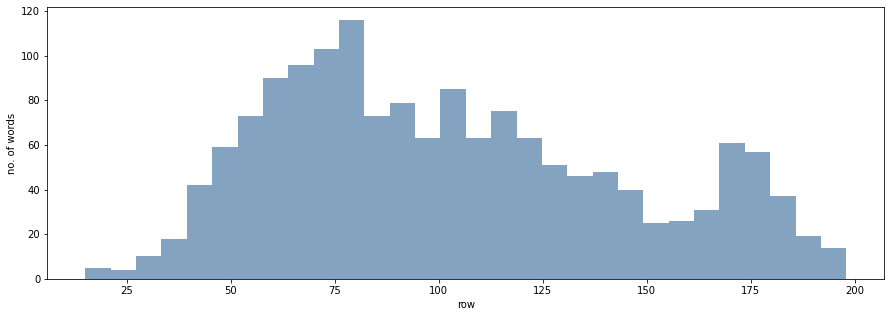

In [19]:
plt.figure( figsize=(15,5))
plt.hist(movieDetails['num_words'],30,color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("row")
plt.ylabel("no. of words")
plt.show()

In [20]:
# lower_ratings = movieDetails[movieDetails['rating'] < median]
# higher_ratings = movieDetails[movieDetails['rating'] > median]
# lower_ratings

## Training the Models

In [21]:
# !pip install scikit-multilearn

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer #used for multi label classification
from sklearn.model_selection import train_test_split

In [23]:
movieDetails.head()
# print("genre type: ",type(movieDetails["genre"][0][0]))

,plot_summary,genre,lemmatized,stemmed,num_words
0,"Former CIA analyst, Jack Ryan is in England wi...","[Action, Thriller]",former cia analyst jack ryan england family va...,former cia analyst jack ryan england famili va...,183
1,"Billy (Michael Douglas), Paddy (Robert De Niro...",[Comedy],billy michael douglas paddy robert de niro arc...,billi michael dougla paddi robert de niro arch...,107
2,"The setting is Camp Firewood, the year 1981. I...","[Comedy, Romance]",setting camp firewood year 1981 last day every...,set camp firewood year 1981 last day everyon g...,116
3,"Fred C. Dobbs and Bob Curtin, both down on the...","[Adventure, Drama, Western]",fred c dobbs bob curtin luck tampico mexico 19...,fred c dobb bob curtin luck tampico mexico 192...,69
4,Tracy Flick is running unopposed for this year...,"[Comedy, Drama, Romance]",tracy flick running unopposed year high school...,traci flick run unoppos year high school stude...,61


## One hot encoding the Labels(targets)

In [24]:
multilabel = MultiLabelBinarizer() #need to create a multilabelbinarizer object.

In [25]:
y = multilabel.fit_transform(movieDetails["genre"])
# pd.DataFrame(y)
print("Dependent variable declared")
pd.DataFrame(y,columns=multilabel.classes_) #multilabel classifiers expect such

Dependent variable declared


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1568,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1569,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# colors = cm.rainbow(np.linspace(0, 1, 21))
# colors

## Visual of Target representation

In [27]:
#Uncomment to see the actual values values
# print(multilabel.classes_)
# print (sum_column)

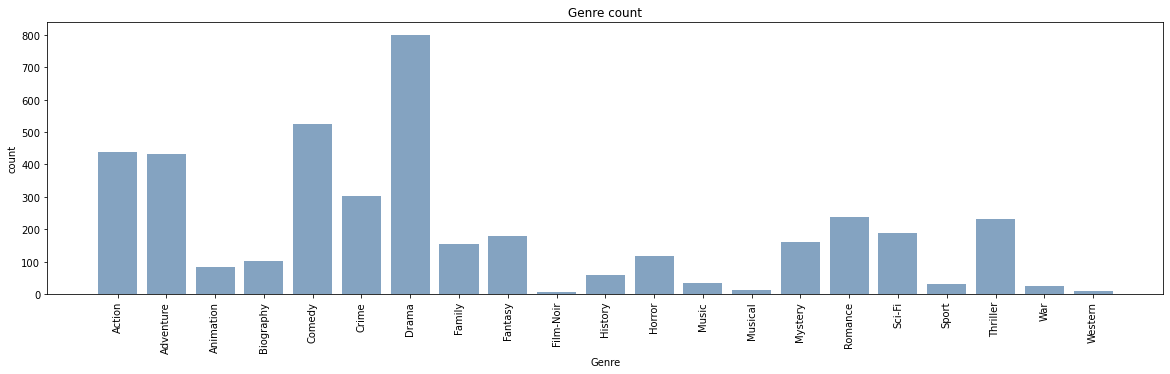

In [28]:
sum_column = y.sum(axis=0)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=90)
plt.title("Genre count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

From the bar chart above we can see the data is heavily biased on the "Drama" movie genre. We can also see a clear under representation by genres such as "Film-Noir" and "western"

In [29]:
print("No of classes: {} i.e {} ".format(len(multilabel.classes_), multilabel.classes_))

No of classes: 21 i.e ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western'] 


# Feature Extraction

## bag of words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
cv = CountVectorizer()

In [32]:
bow = cv.fit_transform(movieDetails["stemmed"]).toarray()
print("Plot Summary BOW matrix")
pd.DataFrame(bow)

Plot Summary BOW matrix


,0,1,2,3,4,5,6,7,8,9,...,13332,13333,13334,13335,13336,13337,13338,13339,13340,13341
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1569,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TFIDF

term frequency multiplication with inverse document frequency, statistical measure that evaluates how relevant a word is to a document 

In [33]:
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....

In [34]:
sum_tfidf = tfidf.fit_transform(movieDetails["stemmed"]).toarray()
print("Plot Summary TF-IDF matrix")
pd.DataFrame(sum_tfidf)

Plot Summary TF-IDF matrix


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## word2vec
Bag of words and TF-IDF both create sparse matrices which are not easy for the model. To overcome this whe use word2vec which will create a dense matrix. They hope to preserve syntactical information 

In [35]:
import gensim
from gensim import corpora,models,similarities

In [36]:
df = []
for i,j in enumerate(movieDetails["plot_summary"]):
#     i.split() 
    
    df.append(word_tokenize(j))

In [37]:
#instantiate model
model = gensim.models.Word2Vec(df,min_count=1, workers=8)
model

In [38]:
print(model)

Word2Vec(vocab=19824, size=100, alpha=0.025)


In [39]:
words= list(model.wv.vocab)

In [40]:
# words

In [41]:
model.most_similar("man",topn=10)

[('who', 0.9995608925819397),
 ('finds', 0.9994881749153137),
 ('has', 0.999421238899231),
 ('no', 0.9993897676467896),
 ('tells', 0.9993395209312439),
 ('woman', 0.9992359280586243),
 ('plane', 0.9992251396179199),
 ('home', 0.9992200136184692),
 ('apartment', 0.999217689037323),
 ('wants', 0.9991987943649292)]

In [42]:
model.save("word2vec.model")

In [43]:
model = gensim.models.Word2Vec.load("word2vec.model")

In [44]:
w2v = pd.DataFrame(model.wv.syn0)
print("Plot Summary Word2Vec matrix")
w2v

Plot Summary Word2Vec matrix


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.327988,-2.248811,-0.582865,0.908692,2.463769,1.422862,-1.620658,-0.969050,-0.256701,0.304572,...,-0.831586,-1.082388,-0.266323,-1.440446,-0.374237,-0.115993,-2.251016,-0.074912,0.545065,-0.010291
1,0.598817,-2.175369,-0.684980,0.737674,2.226087,1.373189,-1.484499,-1.107813,-0.116616,0.242469,...,-0.955405,-0.788626,-0.022000,-1.376875,-0.455645,-0.211957,-2.171652,-0.062042,0.624650,0.131549
2,0.416342,-1.737962,-0.955022,0.788404,2.379122,1.246697,-1.501361,-0.608775,-0.554730,0.008761,...,-1.027132,-1.453486,-0.151182,-1.607739,-0.026564,0.158599,-1.799483,0.320169,0.648511,0.231376
3,0.641088,-2.554594,-0.581204,1.037881,2.532261,1.501351,-1.812978,-1.264396,0.069510,0.328630,...,-0.906615,-0.965630,0.044877,-1.529557,-0.663716,-0.360118,-2.402517,-0.183233,0.573383,-0.029488
4,0.523268,-2.173251,-0.563722,0.793256,2.243747,1.425186,-1.507671,-1.140500,-0.083984,0.271695,...,-0.942516,-0.881844,-0.103112,-1.452690,-0.573821,-0.167320,-2.406755,-0.120919,0.620592,0.075448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19819,0.005354,-0.008906,-0.006960,0.008279,0.011284,0.010686,-0.003318,-0.006826,-0.004149,-0.002381,...,-0.005990,-0.010170,-0.001990,-0.007188,0.000701,-0.001274,-0.010101,-0.002433,0.005932,-0.002776
19820,0.006876,-0.012408,-0.004589,0.005921,0.003193,0.001028,-0.001387,-0.007435,0.000275,-0.002308,...,-0.000525,-0.003006,-0.003569,-0.001939,0.000706,-0.004255,-0.007591,-0.003395,0.003112,-0.004718
19821,0.004522,-0.013667,-0.006085,0.009714,0.016875,0.015457,-0.011238,-0.008891,-0.002734,0.006728,...,-0.007797,-0.012946,-0.006563,-0.010467,-0.001579,-0.003346,-0.016866,-0.003527,0.003479,0.000959
19822,-0.007325,0.007186,-0.008461,-0.000805,0.008959,0.009965,-0.003930,0.005655,-0.007449,-0.005393,...,-0.007362,-0.016355,-0.008407,-0.003628,0.001867,0.008526,-0.001449,0.003226,0.000346,0.003022


Training the model with the word2vec feature representation did not work as the no of rows scaled to more than the value of our output variables i.e y

## select value of X 

the below tab alows you to switch between bag of words and tfidf(For experimentation purposes), by commenting. Over the experiments i noted tfidf produces a better accuracy as it is able to preserve more meaning as compared to the bag of words. We will hence proceed with TFIDF

#### x = tfidf

In [45]:
x = sum_tfidf

#### x = bag of words

In [46]:
# x = bow 

## splitting test and train data

The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2. Hence we will have to move on with the unbalanced dataset. Trying to balance the data through removing the most dominant class i.e  Drama will result in us having alot less data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# 80 - 20 split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=y,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

In [49]:
# 70-30 split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

## Plotting the distribution of Train and Test dataset labels

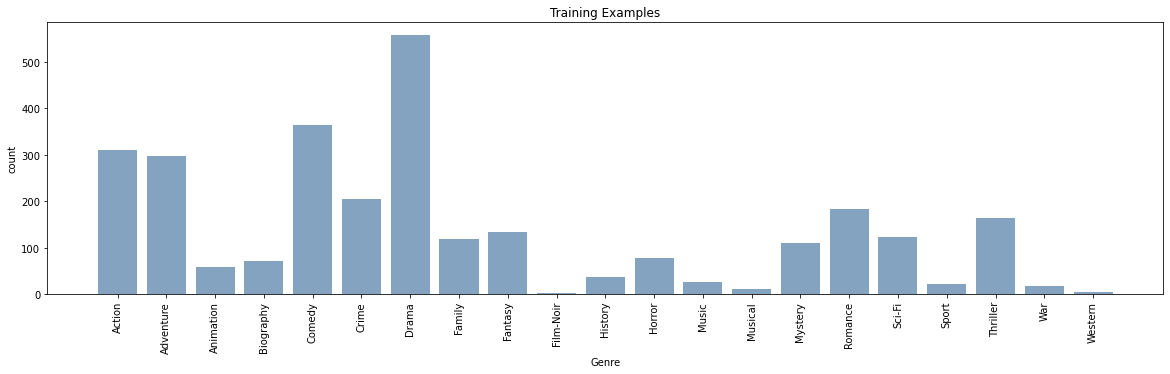

In [50]:
# pd.DataFrame(y_test,columns=multilabel.classes_)
sum_column = y_train.sum(axis=0)
# print(multilabel.classes_)
# print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=90)
plt.title("Training Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

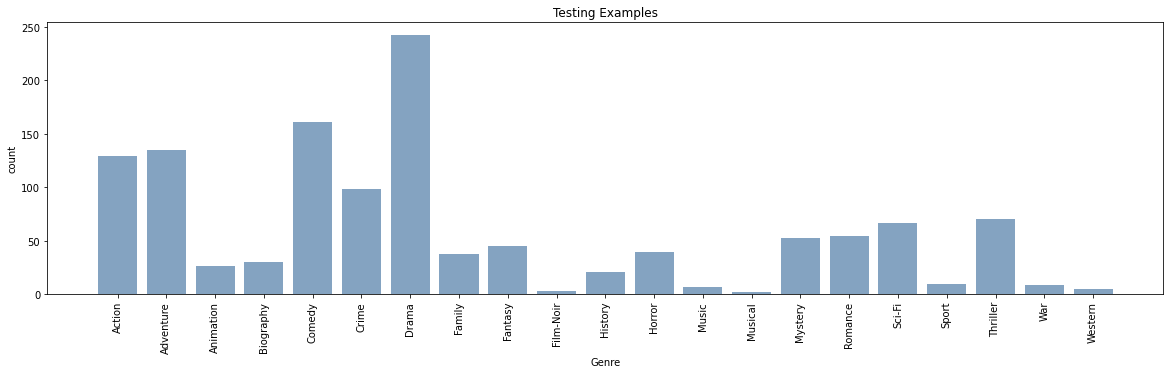

In [51]:
sum_column = y_test.sum(axis=0)
# print(multilabel.classes_)
# print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=90)
plt.title("Testing Examples")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()

## Accuracy functions


In [52]:
#accuracy scores
from sklearn.metrics import accuracy_score,hamming_loss,jaccard_score


In [53]:
def ham_loss(y_true,y_pred): 
    hamn_loss = hamming_loss(y_true,y_pred)
    return hamn_loss

def a_score(y_true,y_pred):
    default_accuracy = accuracy_score(y_true,y_pred)
    return default_accuracy*100

def print_score(y_pred,clf):
    print("*"*50)
    print("model: ** {} **".format(clf.__class__.__name__))
    print("")    
    print("Hamming Loss: {}".format(ham_loss(y_test,y_pred))) #the smaller the better

## Modeling and Evaluation

here we train and test the models. Accuracy is measured using the jaccard score, hamming loss, and scikitlearns score method(for both train and test) 

In [54]:
#machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
#we use the below because we will be using the logistic regression and multilabel binarizer
from sklearn.multiclass import OneVsRestClassifier # will do a classification of one class vs another(multiclass/multi label strategy)

In [55]:
sgd = SGDClassifier()#stochastic gradient descent algorithm
lr = LogisticRegression(solver="lbfgs") #the lbfgs is the algorithm to use in the optimization problem(for multiclass problems)
svc = LinearSVC()
rfc = RandomForestClassifier()

Binary Relevance is a method of solving multilabel classification through treating each label as a separate single class classification problem. [(included) and Jain, 2021)](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)

In [56]:
mNB = BinaryRelevance(MultinomialNB()) #we wrap the model into an sklearn multilabel class estimator

There is no multi-label version of AdaBoost and the label should be the shape of samples number. To classify with multi-label data, you can refer some relative paper methods. [(sklearn), Parry and Parry, 2021)](https://stackoverflow.com/questions/36490645/adaboostclassifier-with-random-forests-for-multilabel-classification-sklearn)

Models tested on are the 
 RandomForest,
 Stochastic gradient descent
 Logistic regression
 Multinomial Naive bayes, 
 linearSVC and MultiLabel KNN

In [57]:
for classifier in [rfc,sgd,lr,svc,mNB.classifier]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred,classifier)
    print("Train accuracy score :",clf.score(x_train,y_train)*100)
    print("Test accuracy score: {}".format(a_score(y_test,y_pred)))
#     confusionmatrix(y_test,y_pred,classifier.__class__.__name__)


**************************************************
model: ** RandomForestClassifier **

Hamming Loss: 0.1089588377723971
Train accuracy score : 100.0
Test accuracy score: 4.872881355932203
**************************************************
model: ** SGDClassifier **

Hamming Loss: 0.09937449556093624
Train accuracy score : 99.90909090909092
Test accuracy score: 8.898305084745763
**************************************************
model: ** LogisticRegression **

Hamming Loss: 0.11067393058918483
Train accuracy score : 6.363636363636363
Test accuracy score: 3.8135593220338984
**************************************************
model: ** LinearSVC **

Hamming Loss: 0.09836561743341404
Train accuracy score : 99.72727272727273
Test accuracy score: 7.415254237288135
**************************************************
model: ** MultinomialNB **

Hamming Loss: 0.1100686037126715
Train accuracy score : 5.7272727272727275
Test accuracy score: 3.8135593220338984


The Multilayer K-Nearest neighbor algorithm implemented below also noted to have a poor accuracy with our dataset

In [58]:
from skmultilearn.adapt import MLkNN
clf = MLkNN(k=len(multilabel.classes_))
# train
clf.fit(x_train, y_train)
# predict
predictions = clf.predict(x_test)

print("Train accuracy score :",clf.score(x_train,y_train)*100)
print("Test accuracy score: {}".format(a_score(y_test,y_pred)))

Train accuracy score : 11.90909090909091
Test accuracy score: 3.8135593220338984


## Best Model

The SGDClassifier showed to have the best accuracy on most of the metrics used

In [59]:
clf = OneVsRestClassifier(sgd) #used previously
# clf = OneVsRestClassifier(CalibratedClassifierCV(sgd))
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print_score(y_pred,sgd)
print("Train accuracy score :",clf.score(x_train,y_train)*100)
testAcc = a_score(y_test,y_pred)
print("Test accuracy score: {}".format(testAcc))

**************************************************
model: ** SGDClassifier **

Hamming Loss: 0.10028248587570622
Train accuracy score : 99.81818181818181
Test accuracy score: 11.440677966101696


In [244]:
modelarr.append({
    "name": "Experiment 1",
    "textAcc": testAcc,
    "model": "SGDClassifier"
})

# Confusion Matrix

In [61]:
y_test.shape, y_pred.shape

((472, 21), (472, 21))

In [62]:
from sklearn.metrics import multilabel_confusion_matrix

In [63]:
mat = multilabel_confusion_matrix(y_test, y_pred)
# mat

In [64]:
def printConfusionMatrix(conf_mat, axes, class_label, class_names, fontsize=10):

    nmatrix = pd.DataFrame(
        conf_mat, index=class_names, columns=class_names,
    )
    
    hm = sns.heatmap(nmatrix, cbar=False, annot=True, fmt="d", ax=axes)
    
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(),  ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(),  ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title( class_label)

The confusion matrix will be based on the model with the best results

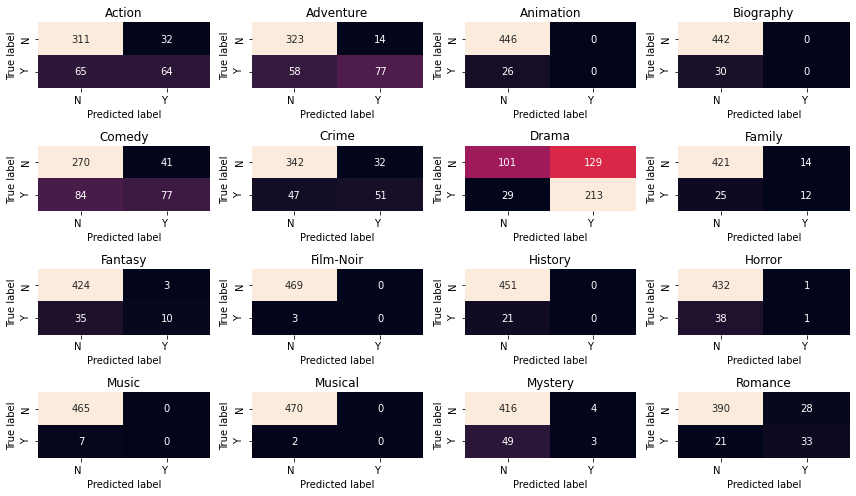

In [65]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))

for axes, cfs_matrix, label in zip(ax.flatten(), mat, multilabel.classes_):
    printConfusionMatrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout() #adds the spacing
plt.show()

## Compute ROC curve and ROC area for each label
ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification. One ROC curve can be drawn per label

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

the for loop below is used to generate the true positive rate and the falsepositive rate as well as the area under the curve

In [67]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i,cls in enumerate(multilabel.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [68]:
import random

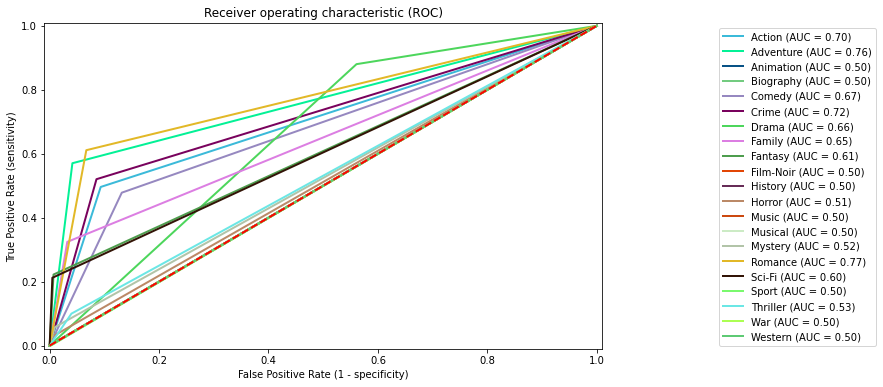

In [69]:
plt.figure(figsize=(10, 6))
lw = 2

for j,cls in enumerate(multilabel.classes_):
    
    r = random.random()
    b = random.random()
    g = random.random()
    
    plt.plot(fpr[j], tpr[j], color=(r, g, b),
         lw=lw, label=f'{cls} (AUC = %0.2f)' % roc_auc[j])
    



plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])

plt.ylabel('True Positive Rate (sensitivity)')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.title('Receiver operating characteristic (ROC)')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

plt.show()

## Classification Evaluation

In [70]:
from sklearn.metrics import classification_report

The classification report is about key metrics in a classification problem.

You'll have precision, recall, f1-score and support for each class you're trying to find.

The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your dataset.

The thing is, precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless. [(scikit-learn? and Hai, 2021](https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn)

In [71]:
print(classification_report(y_test,y_pred,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.67      0.50      0.57       129
   Adventure       0.85      0.57      0.68       135
   Animation       0.00      0.00      0.00        26
   Biography       0.00      0.00      0.00        30
      Comedy       0.65      0.48      0.55       161
       Crime       0.61      0.52      0.56        98
       Drama       0.62      0.88      0.73       242
      Family       0.46      0.32      0.38        37
     Fantasy       0.77      0.22      0.34        45
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        21
      Horror       0.50      0.03      0.05        39
       Music       0.00      0.00      0.00         7
     Musical       0.00      0.00      0.00         2
     Mystery       0.43      0.06      0.10        52
     Romance       0.54      0.61      0.57        54
      Sci-Fi       0.88      0.21      0.34        66
       Sport       0.00    

## save the model to disk

In [72]:
import pickle

In [73]:
#9.2%
filename = 'best_model.model'
# pickle.dump(clf, open(filename, 'wb'))

# Testing 

### load the model from disk

In [74]:
best_model = pickle.load(open(filename, 'rb'))

In [75]:
result = best_model.score(x_test, y_test)
print("Model Accuracy: {:.2f}%".format(result*100))

Model Accuracy: 10.17%


In [76]:
#incase API doesnt work
# movie_plot = ["'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates."]

In [77]:
from requests.auth import HTTPBasicAuth
import requests
import json

In [78]:
api_key = "112c829d"

## Declaring fetch movie function

The below function is used to fetch a movie and return the movie plot and its genre. Implemented using omdbapi APIs

In [79]:
def fetchMovieGenre(movie_title):
    movie_title = movie_title
    # https://www.omdbapi.com/?apikey=112c829d&t=elite
    url = f"https://www.omdbapi.com/?apikey={api_key}&t={movie_title}"
    headers = {"Accept": "application/json"}
    req = requests.get(url, headers=headers)
    movie = json.loads(req.content.decode('utf-8'))
    movie_plot = movie['Plot']
    expected_output = movie["Genre"]
    
    return movie_plot,expected_output

In [80]:
movie_plot,genre = fetchMovieGenre("tom and jerry")
movie_plot

'A weekly Saturday (later Sunday) Morning repackaged compilation with new wraparounds featuring two Tom and Jerry cartoons sandwiching other MGM animated theatrical shorts.'

In [81]:
genre

'Animation, Comedy, Family'

### preprocessing

In [82]:
clean_plot = clean_text(movie_plot)
no_stopwords_plot = remove_Stopwords(clean_plot)
# lemmatized_words = lemmatize_text(no_stopwords_plot)

stemed_words = stem_text(no_stopwords_plot)

In [83]:
mp = []
mp.append(stemed_words)
mp

['weekli saturday later sunday morn repackag compil new wraparound featur two tom jerri cartoon sandwich mgm anim theatric short']

In [84]:
xt = tfidf.transform(mp).toarray()
# xt = cv.fit_transform(mp).toarray()
# xt
# pd.DataFrame(xt)

## predicted output

In [85]:
print("Expected Output: ",genre)

Expected Output:  Animation, Comedy, Family


In [86]:
#predicting from the stored model

arr = best_model.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)
print("Output: ",multilabel.inverse_transform(arr))

Output:  [()]


# Conclusion

In the 1st experiment stemming, tfidf,sgdclassifier was the combination that was able to produce the best results overally, despite the unbalanced dataset.

*******************************************************************************************************************

# Experiment 2 - Training the model after Dimensinality reduction(PCA)

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension being too high, then using PCA to speed it up can be a reasonable choice. This is probably the most common application of PCA. Another common application of PCA is for data visualization.

In [87]:
import texthero as hero

In [88]:
# syn_tfidf = (movieDetails["plot_synopsis"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))#takes too long

The TFIDF matrix is created from the stemmed words, which will them be condensed

In [89]:
sum_tfidf = tfidf.fit_transform(movieDetails["stemmed"]).toarray()
print("Plot Summary TF-IDF matrix")
pd.DataFrame(sum_tfidf)

Plot Summary TF-IDF matrix


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## principal component analysis

The below tab below uses the stemmed plot_summary column (after being converted to tfidf) to generate the PCA column for our new dependent variables

In [90]:
from sklearn.decomposition import PCA

the n_components is used to specify the new width(columns) of the matrix, in this experiment we will try with 15 columns

In [91]:
pca = PCA(n_components=15) 
mod = pca.fit_transform(sum_tfidf)
pca_variance = pca.explained_variance_

mod is the reduced plot_summary TF-IDF

In [92]:
pd.DataFrame(mod)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.003175,0.048628,-0.106801,0.079547,0.046261,-0.026240,-0.015702,0.091699,-0.114243,-0.040688,0.014639,-0.040016,0.050082,-0.087323,0.154096
1,-0.045526,0.018581,0.033401,-0.001719,-0.014867,-0.036553,0.003073,-0.013067,0.056787,-0.012532,-0.031709,-0.030183,-0.013766,-0.015663,-0.022399
2,0.007766,-0.083563,0.023330,-0.024195,-0.019907,0.037708,-0.015763,-0.002690,-0.018667,-0.055201,-0.014165,0.028989,-0.019370,0.024066,0.028163
3,0.012369,0.029277,0.013959,0.045911,-0.049248,-0.041641,0.024238,-0.018989,0.052454,-0.022037,-0.003107,0.008460,0.019268,0.000450,-0.006868
4,-0.076941,0.049062,0.262931,-0.052854,0.016864,-0.000736,-0.010514,-0.049119,-0.056542,-0.030486,0.008328,0.028876,-0.004363,-0.072603,0.051986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,-0.111709,-0.008989,0.021546,0.006347,-0.007209,0.018065,-0.012781,-0.008153,-0.014602,-0.017916,0.007105,0.020923,-0.029068,0.066504,-0.061518
1568,-0.061961,-0.100882,-0.035451,-0.095505,-0.051207,0.026931,-0.072020,0.034622,0.022724,0.011346,-0.104068,-0.031070,0.070386,0.058493,-0.005389
1569,0.105490,-0.056756,-0.012420,0.048669,0.018190,-0.015474,0.024065,-0.114499,-0.027031,0.088800,-0.049386,0.019318,0.018773,-0.043865,-0.035234
1570,-0.072448,-0.052605,-0.066118,-0.010114,-0.068506,0.020791,-0.015564,0.005405,-0.064673,0.004379,0.017954,0.021930,-0.024122,0.041211,0.038534


### Train and test split

Splitting the dataset to train ang test, 80% training, 20% test, with the rows being shuffled

In [93]:
x_train,x_test,y_train,y_test = train_test_split(mod,y,test_size=0.2,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

could not train the using multinomial NB as it does not take in -ve numbers, and modifying the values would make them lose meaning

In [94]:
for classifier in [rfc,sgd,lr,svc]:
    clf2 = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf2.fit(x_train,y_train)
    y_pred = clf2.predict(x_test)
    print_score(y_pred,classifier)
    print("Train accuracy score :",clf2.score(x_train,y_train)*100)
    print("Test accuracy score: {}".format(a_score(y_test,y_pred)))

**************************************************
model: ** RandomForestClassifier **

Hamming Loss: 0.10385487528344671
Train accuracy score : 100.0
Test accuracy score: 9.206349206349207
**************************************************
model: ** SGDClassifier **

Hamming Loss: 0.10249433106575964
Train accuracy score : 7.557677008750995
Test accuracy score: 7.6190476190476195
**************************************************
model: ** LogisticRegression **

Hamming Loss: 0.11126228269085411
Train accuracy score : 3.023070803500398
Test accuracy score: 3.8095238095238098
**************************************************
model: ** LinearSVC **

Hamming Loss: 0.10445956160241875
Train accuracy score : 5.807478122513922
Test accuracy score: 6.666666666666667


## Best Model 

Using the PCA, The random forest classifier produced the best accuracy

In [95]:
clf2 = OneVsRestClassifier(rfc)
# clf = OneVsRestClassifier(CalibratedClassifierCV(sgd))
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
print_score(y_pred,rfc)
print("Train accuracy score :",clf2.score(x_train,y_train)*100)
testAcc2 = a_score(y_test,y_pred)
print("Test accuracy score: {}".format(a_score(y_test,y_pred)))

**************************************************
model: ** RandomForestClassifier **

Hamming Loss: 0.10415721844293273
Train accuracy score : 100.0
Test accuracy score: 9.523809523809524


In [242]:
modelarr.append({
    "name": "Experiment 2",
    "textAcc": testAcc2,
    "model": "RandomForestClassifier"
})

## Confusion Matrix

In [97]:
mat2 = multilabel_confusion_matrix(y_test, y_pred)

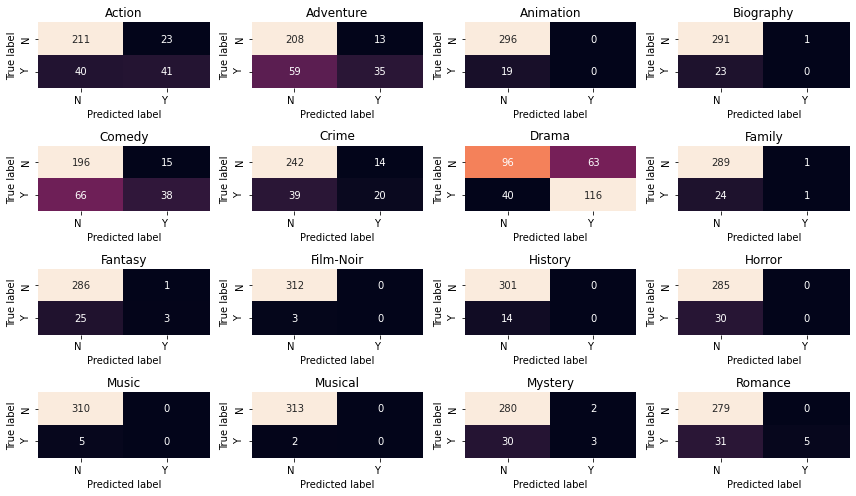

In [98]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))

for axes, cfs_matrix, label in zip(ax.flatten(), mat2, multilabel.classes_):
    printConfusionMatrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()

## Classification Report

The classification report would be more accurate as the dataset is not balanced

In [99]:
print(classification_report(y_test,y_pred,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.64      0.51      0.57        81
   Adventure       0.73      0.37      0.49        94
   Animation       0.00      0.00      0.00        19
   Biography       0.00      0.00      0.00        23
      Comedy       0.72      0.37      0.48       104
       Crime       0.59      0.34      0.43        59
       Drama       0.65      0.74      0.69       156
      Family       0.50      0.04      0.07        25
     Fantasy       0.75      0.11      0.19        28
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        14
      Horror       0.00      0.00      0.00        30
       Music       0.00      0.00      0.00         5
     Musical       0.00      0.00      0.00         2
     Mystery       0.60      0.09      0.16        33
     Romance       1.00      0.14      0.24        36
      Sci-Fi       0.67      0.17      0.28        46
       Sport       0.00    

# Testing with real values

fetching a movie as explained earlier which will be used for testing

In [100]:
plot,genre = fetchMovieGenre("rambo")
plot

'In Thailand, John Rambo joins a group of mercenaries to venture into war-torn Burma, and rescue a group of Christian aid workers who were kidnapped by the ruthless local infantry unit.'

In [101]:
mp = []
clean_plot = clean_text(plot)
no_stopwords_plot = remove_Stopwords(clean_plot)
# lemmatized_words = lemmatize_text(no_stopwords_plot)
stemed_words = stem_text(no_stopwords_plot)
mp.append(stemed_words)
mp

['thailand john rambo join group mercenari ventur wartorn burma rescu group christian aid worker kidnap ruthless local infantri unit']

In [102]:
xt = tfidf.transform(mp).toarray()
xt

array([[0., 0., 0., ..., 0., 0., 0.]])

In [103]:
nxt = pca.transform(xt)
nxt

array([[ 0.07280676,  0.02657517,  0.02304926,  0.02973327,  0.02090871,
        -0.00346792,  0.01419447, -0.07342266,  0.02853352, -0.02441434,
        -0.02406401, -0.05905292,  0.02803124, -0.02294808,  0.01984882]])

In [104]:
print("Expected Output: ",genre)

Expected Output:  Action, Thriller


In [105]:
arr = clf2.predict(nxt)
pd.DataFrame(arr,columns=multilabel.classes_)
print("Predicted Output: ",multilabel.inverse_transform(clf2.predict(nxt)))

Predicted Output:  [('Action',)]


# Conclusion

As the model had a poor score. The model was still able to classify unseen movies quite accurately. The combination was stemming,pca,randomforest

*******************************************************************************************************************


# Experiment 3  - MultiLayer Neural Network

In [106]:
from keras.models import Sequential
from keras.layers import Dense

The sequential model has a single output and a single output

### using unigrams

In [107]:
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
bigram_tfidf = tfidf.fit_transform(movieDetails["stemmed"]).toarray()
print("Plot Summary Bigram TF-IDF matrix")
pd.DataFrame(bigram_tfidf)

Plot Summary Bigram TF-IDF matrix


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### using bigrams

This method showed to produce a model with a fair accuracy, but the one gram model showed better predictions

In [108]:
# tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(2,2), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
# bigram_tfidf = tfidf.fit_transform(movieDetails["stemmed"]).toarray()
# print("Plot Summary Bigram TF-IDF matrix")
# pd.DataFrame(bigram_tfidf)

## Train Test Split

In [173]:
x_train,x_test,y_train,y_test = train_test_split(bigram_tfidf,y,test_size=0.2,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

## Building the Neural net



In [174]:
n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]
print(n_inputs, n_outputs)
# x, y

5000 21


#### Creating the model

A Sequential model is a nn where each layer has exactly one input tensor and one output tensor as below. The below nn is currently using the best parameters as per prev experiments

In [191]:
model = Sequential()
model.add(Dense(n_inputs, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(50))
model.add(Dense(40))
model.add(Dense(n_outputs, activation='sigmoid'))
#optimizer is the learning technique
#loss -> the objective the model will try to minimize(i.e the models grade)
#metrics are extra grades you can get
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])
model

In [112]:
#verbose prints out the progress bar
#epochs -> no. of times you want to go through the ds

model.fit(x_train, y_train, verbose=0, epochs=10,shuffle=True, validation_data=(x_test,y_test))

Epoch 1/10
40/40 [==============================] - 7s 149ms/step - loss: 0.5121 - accuracy: 0.0763 - val_loss: 0.2995 - val_accuracy: 0.1873
Epoch 2/10
40/40 [==============================] - 5s 124ms/step - loss: 0.2384 - accuracy: 0.4301 - val_loss: 0.2603 - val_accuracy: 0.3810
Epoch 3/10
40/40 [==============================] - 5s 124ms/step - loss: 0.1141 - accuracy: 0.6022 - val_loss: 0.2724 - val_accuracy: 0.3810
Epoch 4/10
40/40 [==============================] - 5s 124ms/step - loss: 0.0477 - accuracy: 0.5888 - val_loss: 0.3211 - val_accuracy: 0.3873
Epoch 5/10
40/40 [==============================] - 5s 124ms/step - loss: 0.0206 - accuracy: 0.5543 - val_loss: 0.3818 - val_accuracy: 0.3746
Epoch 6/10
40/40 [==============================] - 5s 124ms/step - loss: 0.0105 - accuracy: 0.5463 - val_loss: 0.4127 - val_accuracy: 0.3746
Epoch 7/10
40/40 [==============================] - 5s 128ms/step - loss: 0.0054 - accuracy: 0.5107 - val_loss: 0.4479 - val_accuracy: 0.3683
Epoch 

#### Training the model

In [192]:
# fit the model on all data
hist = model.fit(x_train, y_train, verbose=1, epochs=5,shuffle=True, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/5
40/40 [==============================] - 6s 128ms/step - loss: 0.4750 - accuracy: 0.0885 - val_loss: 0.2997 - val_accuracy: 0.2127
Epoch 2/5
40/40 [==============================] - 5s 126ms/step - loss: 0.2404 - accuracy: 0.3835 - val_loss: 0.2613 - val_accuracy: 0.2889
Epoch 3/5
40/40 [==============================] - 5s 126ms/step - loss: 0.1306 - accuracy: 0.5045 - val_loss: 0.2619 - val_accuracy: 0.3905
Epoch 4/5
40/40 [==============================] - 5s 125ms/step - loss: 0.0522 - accuracy: 0.5413 - val_loss: 0.3138 - val_accuracy: 0.3397
Epoch 5/5
40/40 [==============================] - 5s 126ms/step - loss: 0.0194 - accuracy: 0.4948 - val_loss: 0.3641 - val_accuracy: 0.3492


### Interpreting the model

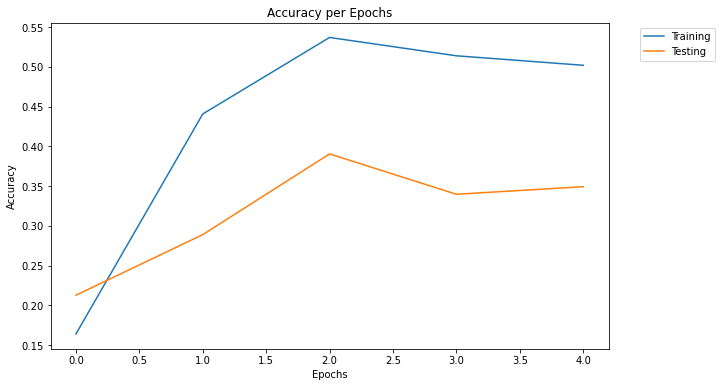

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epochs")
plt.legend(["Training","Testing"],loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

From the graph above, We can see the accuracy increasing as we increase the number of epochs. We can also see that as both graphs are increasing we can say the model can continue to run for some more epochs as it has not overfit yet.

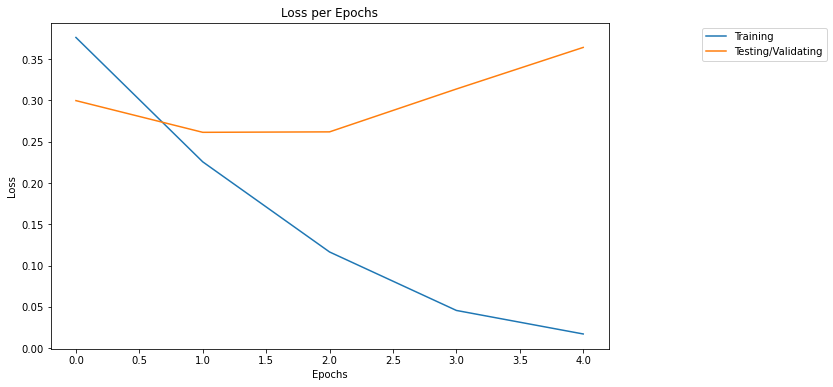

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss per Epochs")
plt.legend(["Training","Testing/Validating"],loc='upper right',bbox_to_anchor=(1.4, 1))
plt.show()

from the graph above we can see the loss decrease as the number of epochs increases, which is what we want. We would also want to stop when the graph starts going up

#### Testing the model

In [195]:
ypred = model.predict(x_test,verbose=1)
pd.DataFrame(ypred)

10/10 [==============================] - 0s 17ms/step


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000663,0.000744,0.001105,0.000196,0.966319,0.005541,0.624660,0.016456,0.000068,0.000003,...,0.000006,0.000021,0.000102,0.000039,0.397904,0.000092,2.628088e-03,0.000857,0.000175,0.000243
1,0.009307,0.000402,0.000012,0.015813,0.019466,0.282505,0.980417,0.000017,0.000037,0.000006,...,0.000383,0.000123,0.000064,0.085087,0.007147,0.005282,4.486293e-03,0.200151,0.000339,0.000090
2,0.000072,0.031896,0.000331,0.019664,0.024633,0.000028,0.999714,0.065269,0.011327,0.000018,...,0.000636,0.000143,0.000323,0.000105,0.052321,0.000018,1.048416e-03,0.000858,0.014047,0.000894
3,0.334878,0.090540,0.001409,0.000413,0.023148,0.006067,0.054051,0.001665,0.235673,0.000771,...,0.055655,0.002941,0.000933,0.002307,0.001301,0.012232,1.021534e-03,0.004080,0.000100,0.000330
4,0.996145,0.999954,0.008224,0.000026,0.000090,0.000056,0.001601,0.002284,0.988156,0.003410,...,0.000012,0.000074,0.000026,0.000028,0.000189,0.001290,7.696672e-07,0.000189,0.000003,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0.998871,0.902978,0.000808,0.000228,0.000493,0.095915,0.011211,0.000038,0.026416,0.000537,...,0.000033,0.001367,0.000087,0.001269,0.000338,0.041936,1.170277e-04,0.023250,0.000007,0.000026
311,0.289522,0.025778,0.002843,0.000058,0.105473,0.002962,0.009358,0.000310,0.014801,0.000119,...,0.050660,0.001565,0.000270,0.006318,0.001644,0.451943,7.688701e-04,0.002262,0.000123,0.000265
312,0.000133,0.016919,0.007838,0.001487,0.991650,0.022285,0.026882,0.026693,0.005297,0.000114,...,0.000777,0.000197,0.000088,0.000073,0.003947,0.000021,1.618624e-03,0.000338,0.000960,0.000070
313,0.037094,0.010219,0.000944,0.081375,0.003059,0.009189,0.995045,0.000504,0.006831,0.000097,...,0.000831,0.008747,0.001229,0.001294,0.008342,0.003218,7.287836e-02,0.025800,0.007240,0.000271


### Test scores

The neural network scored quite poorly as seen below

In [196]:
y_pred = y_pred.round()
testAcc3 = a_score(y_test,y_pred)
print("Test accuracy score: {}".format(testAcc3))

Test accuracy score: 9.523809523809524


In [241]:
modelarr.append({
    "name": "Experiment 3",
    "textAcc": testAcc3,
    "model": "Neural Net 1"
})

In [198]:
model.evaluate(x_test, y_test,verbose=1)

10/10 [==============================] - 0s 16ms/step - loss: 0.3641 - accuracy: 0.3492


[0.3641112446784973, 0.3492063581943512]

In [199]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5000)              25005000  
_________________________________________________________________
dense_17 (Dense)             (None, 50)                250050    
_________________________________________________________________
dense_18 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_19 (Dense)             (None, 21)                861       
Total params: 25,257,951
Trainable params: 25,257,951
Non-trainable params: 0
_________________________________________________________________


### Confusion Matrix

In [200]:
mat3 = multilabel_confusion_matrix(y_test, y_pred)

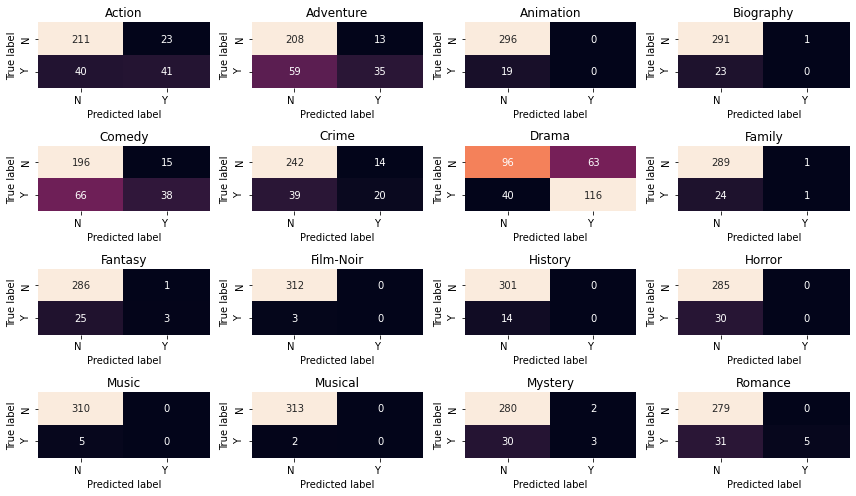

In [201]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))

for axes, cfs_matrix, label in zip(ax.flatten(), mat3, multilabel.classes_):
    printConfusionMatrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()

## Classification Report

The classification report would be more accurate as the dataset is not balanced as explained earlier

In [202]:
print(classification_report(y_test,y_pred,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.64      0.51      0.57        81
   Adventure       0.73      0.37      0.49        94
   Animation       0.00      0.00      0.00        19
   Biography       0.00      0.00      0.00        23
      Comedy       0.72      0.37      0.48       104
       Crime       0.59      0.34      0.43        59
       Drama       0.65      0.74      0.69       156
      Family       0.50      0.04      0.07        25
     Fantasy       0.75      0.11      0.19        28
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        14
      Horror       0.00      0.00      0.00        30
       Music       0.00      0.00      0.00         5
     Musical       0.00      0.00      0.00         2
     Mystery       0.60      0.09      0.16        33
     Romance       1.00      0.14      0.24        36
      Sci-Fi       0.67      0.17      0.28        46
       Sport       0.00    

# Testing with real values

fetching a movie as explained earlier which will be used for testing

In [203]:
plot,genre = fetchMovieGenre("superman")
plot

"An alien orphan is sent from his dying planet to Earth, where he grows up to become his adoptive home's first and greatest superhero."

In [204]:
genre

'Action, Adventure, Drama, Sci-Fi'

In [205]:
mp = []
clean_plot = clean_text(plot)
no_stopwords_plot = remove_Stopwords(clean_plot)
# lemmatized_words = lemmatize_text(no_stopwords_plot)
stemed_words = stem_text(no_stopwords_plot)
mp.append(stemed_words)
mp

['alien orphan sent die planet earth grow becom adopt home first greatest superhero']

In [206]:
bxt = tfidf.transform(mp).toarray()
pd.DataFrame(bxt)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
arr3 = model.predict(bxt)

In [208]:
arr3 = arr3.round()
pd.DataFrame(arr3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
print("Expected output: ", genre)

Expected output:  Action, Adventure, Drama, Sci-Fi


In [210]:
print("output: ",multilabel.inverse_transform(arr3))

output:  [('Comedy', 'Drama')]


# Conclusion

The above model was able to predict mostly from the Drama category, thus might have been affected by the bias of the data. It awas also able to predict quite well on unseen data

*******************************************************************************************************************

# Experiment 4 - Neural Network and PCA

For this experiment we will use deep learning, Lemmatization,TF-IDF and PCA dimensionality reduction

In [211]:
movieDetails

,plot_summary,genre,lemmatized,stemmed,num_words
0,"Former CIA analyst, Jack Ryan is in England wi...","[Action, Thriller]",former cia analyst jack ryan england family va...,former cia analyst jack ryan england famili va...,183
1,"Billy (Michael Douglas), Paddy (Robert De Niro...",[Comedy],billy michael douglas paddy robert de niro arc...,billi michael dougla paddi robert de niro arch...,107
2,"The setting is Camp Firewood, the year 1981. I...","[Comedy, Romance]",setting camp firewood year 1981 last day every...,set camp firewood year 1981 last day everyon g...,116
3,"Fred C. Dobbs and Bob Curtin, both down on the...","[Adventure, Drama, Western]",fred c dobbs bob curtin luck tampico mexico 19...,fred c dobb bob curtin luck tampico mexico 192...,69
4,Tracy Flick is running unopposed for this year...,"[Comedy, Drama, Romance]",tracy flick running unopposed year high school...,traci flick run unoppos year high school stude...,61
...,...,...,...,...,...
1567,Evan Treborn grows up in a small town with his...,"[Sci-Fi, Thriller]",evan treborn grows small town single working m...,evan treborn grow small town singl work mother...,108
1568,Brandon is a 30-something man living in New Yo...,[Drama],brandon 30something man living new york unable...,brandon 30someth man live new york unabl manag...,53
1569,Evacuation of Allied soldiers from the British...,"[Action, Drama, History]",evacuation allied soldier british empire franc...,evacu alli soldier british empir franc cut sur...,45
1570,"For a while now, beautiful 24-year-old Diana B...","[Comedy, Drama]",beautiful 24yearold diana bruni who happily ma...,beauti 24yearold diana bruni who happili marri...,164


We will used the lemmatized column to create the TF-IDF matrix which we will later reduce

In [212]:
lem_tfidf = tfidf.fit_transform(movieDetails["lemmatized"]).toarray()
print("Plot Summary TF-IDF matrix")
pd.DataFrame(lem_tfidf)

Plot Summary TF-IDF matrix


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## creating the new reduced matrix

Reduced the 5000 columns down to 10 columns

In [213]:
pca = PCA(n_components=10) 
mod2 = pca.fit_transform(lem_tfidf)

In [214]:
pca.explained_variance_

array([0.00409489, 0.00332617, 0.00316174, 0.00296983, 0.00278198,
       0.00268648, 0.00259476, 0.00255621, 0.0025218 , 0.00243235])

Uncomment below to see the values of our new x and unmodified y

In [215]:
# pd.DataFrame(mod2)

In [216]:
# pd.DataFrame(y)

# Train test split

The data will be split 70 -30

In [217]:
x_train,x_test,y_train,y_test = train_test_split(mod2,y,test_size=0.3,random_state=10)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1100, 10), (472, 10), (1100, 21), (472, 21))

In [218]:
n_inputs, n_outputs = x_train.shape[1], y_train.shape[1]
print(n_inputs, n_outputs)

10 21


## Initializing the NN

In [219]:
model = Sequential()
model.add(Dense(10, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(13))
model.add(Dense(17))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model

## Training the NN

In [220]:
model.fit(x_train, y_train, verbose=0, epochs=10,shuffle=True, validation_data=(x_test,y_test))

In [221]:
hist2 = model.fit(x_train, y_train, verbose=0, epochs=15,shuffle=True, batch_size=32, validation_data=(x_test,y_test))

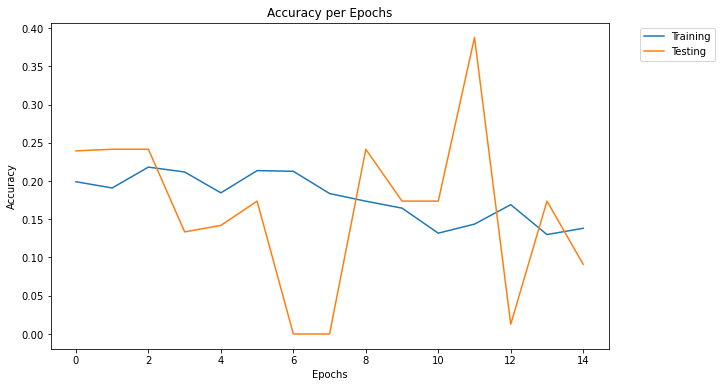

In [222]:
plt.figure(figsize=(10, 6))
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epochs")
plt.legend(["Training","Testing"],loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

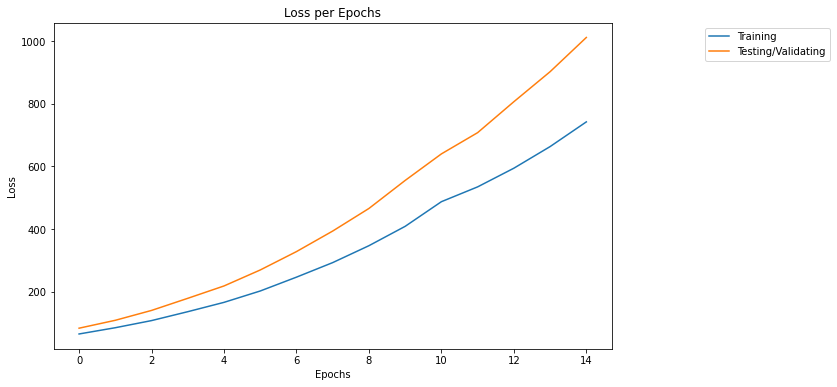

In [223]:
plt.figure(figsize=(10, 6))
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss per Epochs")
plt.legend(["Training","Testing/Validating"],loc='upper right',bbox_to_anchor=(1.4, 1))
plt.show()

As the loss is increasing this is generally a bad result

In [224]:
ypred3 = model.predict(x_test)
pd.DataFrame(ypred3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000005,0.001013,0.0,8.871340e-19,0.004233,2.190767e-33,0.478924,0.0,0.515822,0.0,...,2.051236e-29,0.0,0.0,4.333993e-29,3.047449e-07,1.111373e-13,0.0,1.812891e-06,0.0,0.0
1,0.000002,0.000560,0.0,1.531372e-20,0.002260,1.157696e-36,0.433235,0.0,0.563942,0.0,...,2.762592e-32,0.0,0.0,5.952122e-32,8.845497e-08,6.217085e-15,0.0,7.025800e-07,0.0,0.0
2,0.000003,0.000894,0.0,3.653166e-19,0.003605,3.979856e-34,0.498720,0.0,0.496776,0.0,...,4.451187e-30,0.0,0.0,9.972301e-30,2.193869e-07,5.477438e-14,0.0,1.262485e-06,0.0,0.0
3,0.000003,0.000895,0.0,4.175389e-19,0.003701,4.584456e-34,0.491382,0.0,0.504018,0.0,...,5.238741e-30,0.0,0.0,1.155475e-29,2.174290e-07,6.091578e-14,0.0,1.273406e-06,0.0,0.0
4,0.000001,0.000405,0.0,4.073470e-21,0.001960,1.051844e-37,0.415810,0.0,0.581823,0.0,...,3.051382e-33,0.0,0.0,7.234606e-33,4.981120e-08,2.264831e-15,0.0,3.111487e-07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.000003,0.000882,0.0,2.941077e-19,0.003487,2.339586e-34,0.506563,0.0,0.489064,0.0,...,2.947743e-30,0.0,0.0,6.604033e-30,1.936041e-07,4.685000e-14,0.0,1.218845e-06,0.0,0.0
468,0.000005,0.001059,0.0,1.286723e-18,0.004082,3.650199e-33,0.501312,0.0,0.493540,0.0,...,3.154703e-29,0.0,0.0,7.040145e-29,3.171269e-07,1.320798e-13,0.0,1.737971e-06,0.0,0.0
469,0.000008,0.001389,0.0,5.972317e-18,0.005080,7.160923e-32,0.477365,0.0,0.516154,0.0,...,4.388562e-28,0.0,0.0,8.659777e-28,6.430438e-07,4.338675e-13,0.0,3.544825e-06,0.0,0.0
470,0.000007,0.001319,0.0,4.937819e-18,0.005575,4.757287e-32,0.535262,0.0,0.457834,0.0,...,3.152404e-28,0.0,0.0,6.765506e-28,4.655358e-07,3.587148e-13,0.0,2.472811e-06,0.0,0.0


# Accuracy Score

In [225]:
ypred3 = ypred3.round()
testAcc4 = a_score(y_test,ypred3)
print("Test accuracy score: {}".format(testAcc4))

Test accuracy score: 1.4830508474576272


In [240]:
modelarr.append({
    "name": "Experiment 4",
    "textAcc": testAcc4,
    "model": "Neural Net 2"
})

In [227]:
ypred3.shape, y_test.shape

((472, 21), (472, 21))

# Confusion Matrix

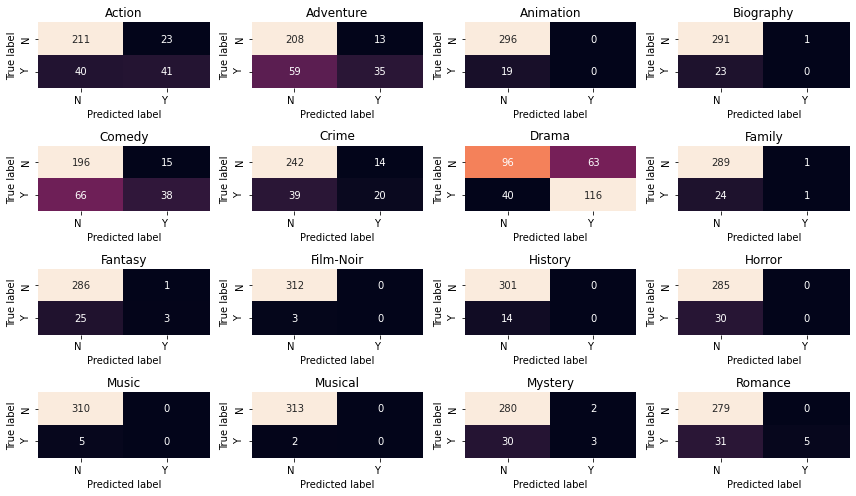

In [228]:
mat4 = multilabel_confusion_matrix(y_test, ypred3)
fig, ax = plt.subplots(4, 4, figsize=(12, 7))

for axes, cfs_matrix, label in zip(ax.flatten(), mat3, multilabel.classes_):
    printConfusionMatrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()

## Classification Report

good accuracy measure for unbalanced datasets

In [229]:
print(classification_report(y_test,ypred3,target_names=multilabel.classes_))

              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       114
   Adventure       0.00      0.00      0.00       123
   Animation       0.00      0.00      0.00        22
   Biography       0.00      0.00      0.00        30
      Comedy       0.00      0.00      0.00       166
       Crime       0.00      0.00      0.00        91
       Drama       0.69      0.44      0.53       257
      Family       0.00      0.00      0.00        50
     Fantasy       0.16      0.71      0.26        55
   Film-Noir       0.00      0.00      0.00         2
     History       0.00      0.00      0.00        18
      Horror       0.00      0.00      0.00        25
       Music       0.00      0.00      0.00        11
     Musical       0.00      0.00      0.00         3
     Mystery       0.00      0.00      0.00        45
     Romance       0.00      0.00      0.00        82
      Sci-Fi       0.00      0.00      0.00        52
       Sport       0.00    

As we can see most values are 0, which shows the model performed quite poorly

# Testing with real values

In [230]:
plot,genre = fetchMovieGenre("superman")
mp = []
clean_plot = clean_text(plot)
no_stopwords_plot = remove_Stopwords(clean_plot)
# lemmatized_words = lemmatize_text(no_stopwords_plot)
stemed_words = stem_text(no_stopwords_plot)
mp.append(stemed_words)
xt = tfidf.transform(mp).toarray()
nxt = pca.transform(xt)
arr4 = model.predict(nxt)
arr4 = arr4.round()
print("Expected: ", genre)
print(" ")
print("output: ",multilabel.inverse_transform(arr4))

Expected:  Action, Adventure, Drama, Sci-Fi
 
output:  [('Fantasy',)]


# Experiment 4 conclusion

This seemed to produce the worst model so far -> lemmatizing,PCA,NN

*******************************************************************************************************************

*******************************************************************************************************************

# Final conclusion - Which experiment did best?

In [245]:
# modelarr=[]
experiments = []
accuracy=[]
modeltype = []

In [246]:
for i in range(0,len(modelarr)):
    experiments.append(modelarr[i]["name"])
    accuracy.append(modelarr[i]["textAcc"].round())
    modeltype.append(modelarr[i]["model"])
    

In [247]:
print(experiments)
print(modeltype)
accuracy

['Experiment 4', 'Experiment 3', 'Experiment 2', 'Experiment 1']
['Neural Net 2', 'Neural Net 1', 'RandomForestClassifier', 'SGDClassifier']


[1.0, 10.0, 10.0, 11.0]

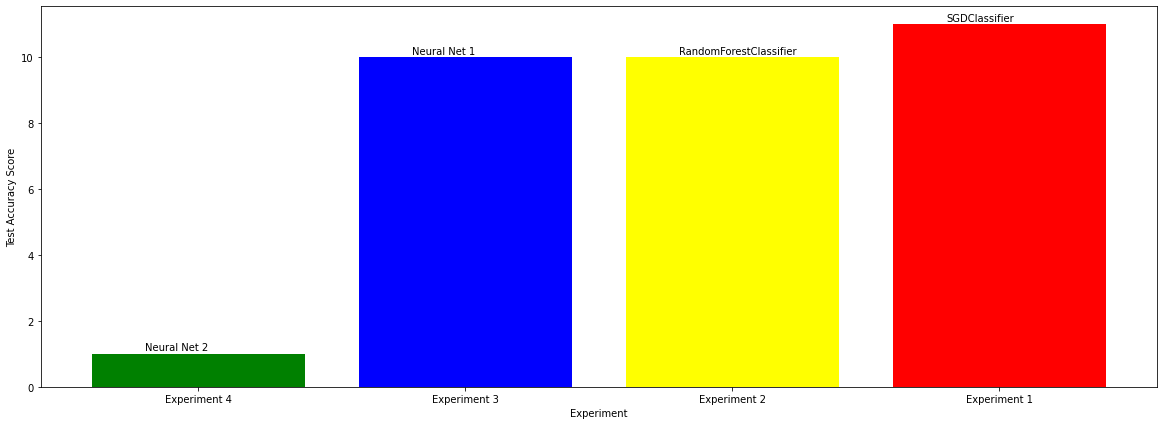

In [248]:
plt.figure(figsize=(20,7))
plt.bar(experiments,accuracy,color=['green',"blue","yellow","red"])
xlocs, xlabs = plt.xticks()
for i, v in enumerate(accuracy):
    plt.text(xlocs[i] + -0.2, v + 0.1, str(modeltype[i]))
plt.xlabel("Experiment")
plt.ylabel("Test Accuracy Score")
plt.show()

In conclusion the Experiment one, using the SGDClassifier model showed to have the highest accuracy on test data. As the dataset is unbalanced, other metrics such as recall and precision should also be used. Note the graph above keeps on changing as inputs change

*******************************************************************************************************************

# References

(sklearn), A., Parry, C. and Parry, C., 2021. AdaBoostClassifier with Random Forests for multilabel classification (sklearn). [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/36490645/adaboostclassifier-with-random-forests-for-multilabel-classification-sklearn> [Accessed 1 May 2021].

Brownlee, J., 2021. Multi-Label Classification with Deep Learning. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/multi-label-classification-with-deep-learning/> [Accessed 1 May 2021].

scikit-learn?, H. and Hai, M., 2021. How to interpret classification report of scikit-learn?. [online] Data Science Stack Exchange. Available at: <https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn> [Accessed 1 May 2021].